<a href="https://colab.research.google.com/github/nitiniitp/Brain-tumor/blob/main/4th_Nurse_Care_Activity_Recognition_Challenge_Nitin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4th Nurse Care Activity Recognition Challenge

This notebook has been designed for the 4th Nurse Care Activity Recognition Challenge competition with the the aim of providing the basic knowledge of Human Activity Forecasting.

If you have any questions, please feel free to email abc2022@sozolab.jp with the subject *4th Nurse Care Activity Recognition Challenge.*

About this dataset and challenge -> https://abc-research.github.io/challenge2022/

This notebook was prepared by Haru Kaneko and Nazmun Nahid.



# 1.Exploring the data

**This tutorial is made in Google Colab. So, first we need to connect the Google Drive to access the data. You can directly add folder path to access the data.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Then we need to import pandas(https://pandas.pydata.org/docs/), numpy(https://numpy.org/doc/) and matplotlib(https://matplotlib.org/stable/index.html).**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

**First, we have to load the data. In this tutorial, we only use the train data of a single user to make the process simple.**

In [ ]:
# Load data
df1=pd.read_csv('/content/acc_user25.csv')
df2=pd.read_csv('/content/train25.csv')

## Let's check the details of Data


**We can see that the data file contains 5 columns: subject_id, datetime, and 3 coordinates of the accelerometer data.**

In [ ]:
df1.head(5)

,subject_id,datetime,x,y,z
0,25,2018-06-01T11:59:12.131+0900,-1.992,7.240,6.228
1,25,2018-06-01T12:04:33.593+0900,-2.528,6.665,6.490
2,25,2018-06-01T14:19:00.553+0900,2.145,-8.887,0.476
3,25,2018-06-01T14:30:52.500+0900,3.447,2.758,8.789
4,25,2018-06-02T07:55:57.973+0900,0.689,-0.651,9.763


**We can see that the data file 8 columns: id (label id), user_id(nurse/care giver), activity_type_id(unique id for each activity type), activity_type (name), target_id (patients), activity2user_id, start and finish timestamp of the activity.**


In [ ]:
df2.head(5)

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4566,25,26,休憩,25,26469,2018-04-05 12:36:47+09:00,2018-04-05 13:57:36+09:00,2018-04-05-12.0
1,4830,25,26,休憩,25,26886,2018-04-06 12:53:14+09:00,2018-04-06 14:23:37+09:00,2018-04-06-12.0
2,4900,25,26,休憩,25,27202,2018-04-07 12:54:36+09:00,2018-04-07 14:14:57+09:00,2018-04-07-12.0
3,5126,25,26,休憩,25,27826,2018-04-10 13:04:54+09:00,2018-04-10 14:05:57+09:00,2018-04-10-13.0
4,5770,25,26,休憩,25,29610,2018-04-13 12:25:08+09:00,2018-04-13 13:53:37+09:00,2018-04-13-12.0


In [ ]:
df1.shape # to check the row column info

(1896318, 5)

In [ ]:
df2.shape # to check the row column info

(765, 9)

In [ ]:
df1.isnull().sum()# to check the missing value info

subject_id    0
datetime      0
x             0
y             0
z             0
dtype: int64

In [ ]:
df2.isnull().sum()# to check the missing info

id                       0
user_id                  0
activity_type_id         0
activity_type            0
target_id                0
activity2user_id         0
start                    0
finish                  16
year-month-date-hour     0
dtype: int64

## Visualization of the data

**We need to format the datetime.**

In [ ]:
df1 = df1.sort_values('datetime')

**Now let’s visualize the acceleration data in df1**

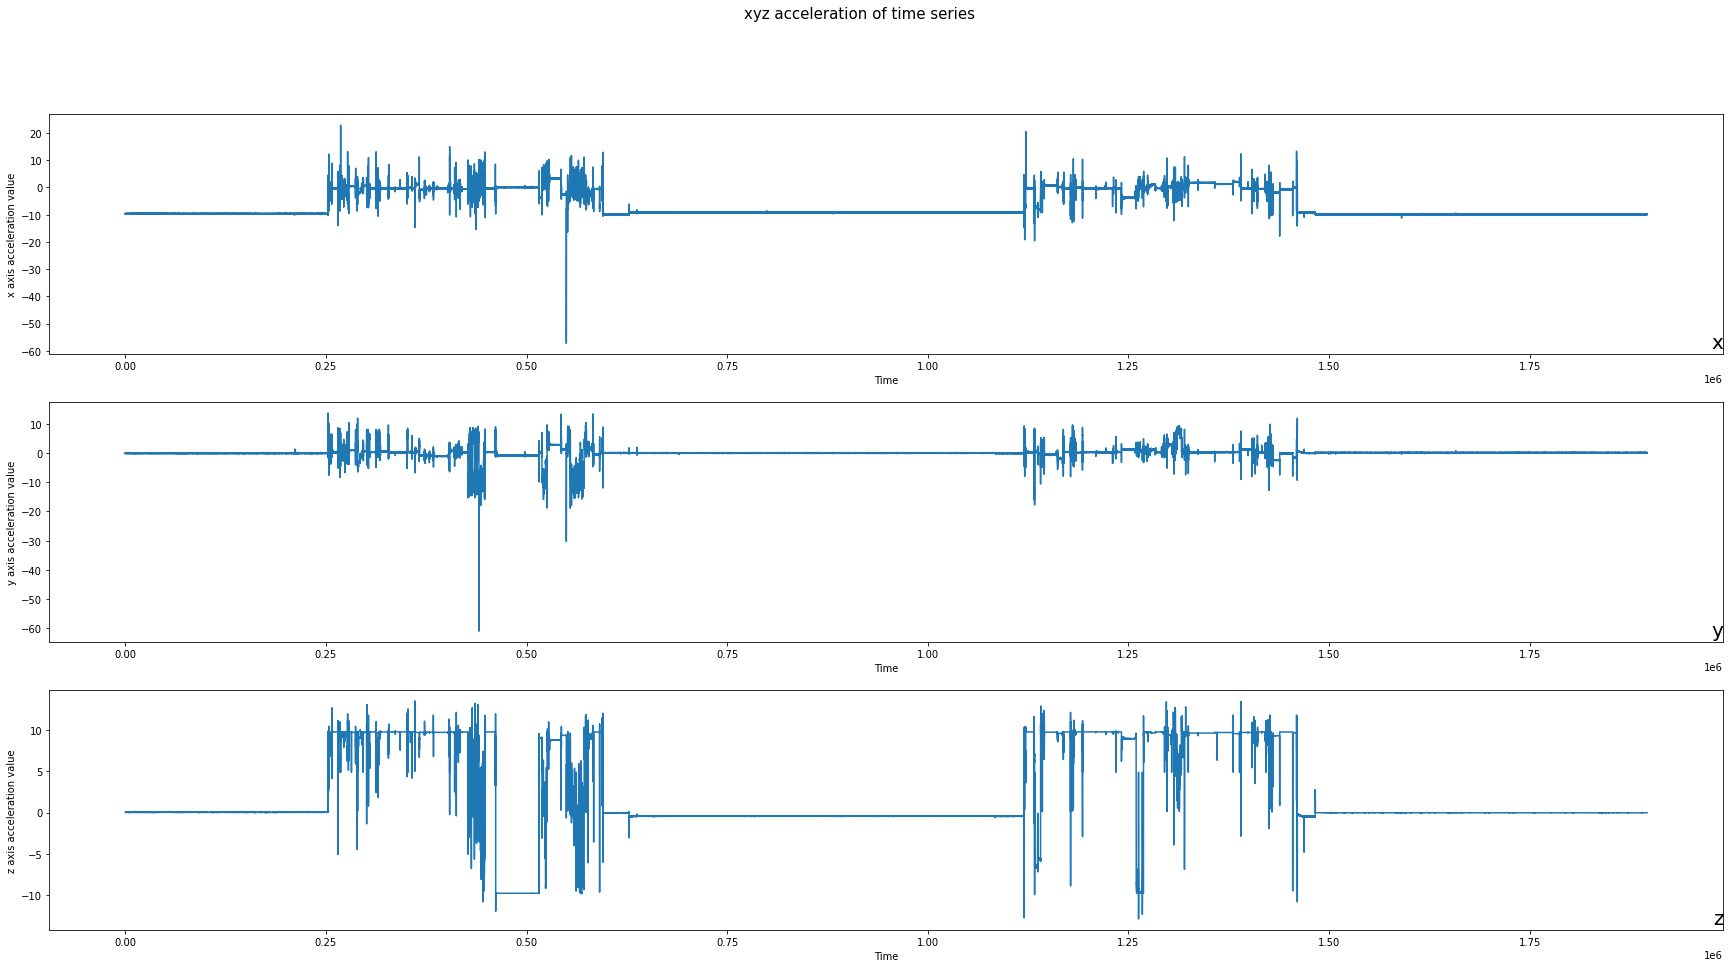

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt

values1 = df1.values
cols_dic = {2:'x', 3:'y', 4:'z'}

# plot x/y/z column
i = 1
fig = plt.figure(figsize=(30,15))
for k, col_name in cols_dic.items():
	plt.subplot(len(cols_dic), 1, i)
	plt.plot(values1[:, k])
	plt.title(col_name, y=0, loc='right', fontsize=20)
	plt.xlabel('Time')
	plt.ylabel('{0} axis acceleration value'.format(col_name))
	i += 1

fig.suptitle("xyz acceleration of time series", size=15)
plt.show()
del values1, cols_dic

**Here we can see the signals of the three axis of the accelerometer data separately.**

**Now let’s check the quantity of each activity type from df2.**

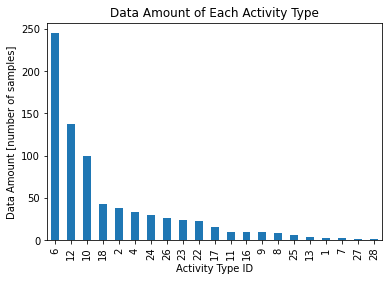

In [ ]:
tmp_data_count = df2['activity_type_id'].value_counts()
tmp_data_count.plot(kind='bar')
plt.title('Data Amount of Each Activity Type')
plt.xlabel('Activity Type ID')
plt.ylabel('Data Amount [number of samples]')

del tmp_data_count

# 2.Prediction (with Care Records and Accelerometer)
Hourly Based Activity Forecasting Using Care Records and Accelerometer Data



## 2.1 Preprocessing

**Now we need to import datetime(https://docs.python.org/3/library/datetime.html) module as we are going to work with time series data.**

In [ ]:
import datetime

**We are going to put the data frames to different data frames for ease of use. It is not mandatory to do so**

In [ ]:
user_df = df1
act_df = df2

del df1, df2

In [ ]:
user_df.head() # Just to see the data structure again

,subject_id,datetime,x,y,z
1894805,25,2018-05-31T23:59:59.563+0900,-9.692,-0.076,0.048
1895376,25,2018-05-31T23:59:59.563+0900,-9.692,-0.076,0.048
1895711,25,2018-05-31T23:59:59.571+0900,-9.692,-0.076,0.048
1895475,25,2018-05-31T23:59:59.571+0900,-9.692,-0.076,0.048
1786494,25,2018-05-31T23:59:59.763+0900,-9.730,0.000,0.047


In [ ]:
act_df.head() # Just to see the data structure again

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour
0,4566,25,26,休憩,25,26469,2018-04-05 12:36:47+09:00,2018-04-05 13:57:36+09:00,2018-04-05-12.0
1,4830,25,26,休憩,25,26886,2018-04-06 12:53:14+09:00,2018-04-06 14:23:37+09:00,2018-04-06-12.0
2,4900,25,26,休憩,25,27202,2018-04-07 12:54:36+09:00,2018-04-07 14:14:57+09:00,2018-04-07-12.0
3,5126,25,26,休憩,25,27826,2018-04-10 13:04:54+09:00,2018-04-10 14:05:57+09:00,2018-04-10-13.0
4,5770,25,26,休憩,25,29610,2018-04-13 12:25:08+09:00,2018-04-13 13:53:37+09:00,2018-04-13-12.0


**We can see that the data have a lot of problems. Let’s  try to solve it a bit.**

In [ ]:
user_df = user_df.dropna() # to drop the nan values
user_df = user_df.sort_values('datetime') # While doing time series analysis it is very important to sort the file according to time stamp
user_df = user_df.drop_duplicates() # to drop duplicate columns

In [ ]:
act_df = act_df.drop_duplicates('id') # to drop duplicate columns
act_df = act_df.dropna() # to drop the nan values

**Now we need to format the time stamp**

In [ ]:
# Convert [datetime/start/finish] to datetime
user_df['datetime']= pd.to_datetime(user_df['datetime'], format='%Y-%m-%dT%H:%M:%S.%f%z')
act_df['start'] = pd.to_datetime(act_df['start'])
act_df['finish'] = pd.to_datetime(act_df['finish'])

In [ ]:
act_df['year-month-date'] = act_df['start'].dt.date.astype(str) # to create year-month-date column
act_df['hour'] = act_df['start'].dt.hour # to create hour column
act_df['year-month-date-hour'] = act_df['year-month-date'].astype(str) + '-' +act_df['hour'].astype(str).str.zfill(2) # to create year-month-date-hour column

act_df = act_df.sort_values('start') # to sort values

ACT_LABELS = list(act_df['activity_type_id'].value_counts().index) # 1)Activity Type List
USERS = list(act_df['user_id'].value_counts().index) # 2) User ID List

**Now let’s  check the number of data in each time period from 0 am to 23pm.**

In [ ]:
user_df['datetime'].dt.hour.value_counts().sort_index()

0     72117
1     71217
2     72148
3     70293
4     50695
5     46781
6     48633
7     56613
8     55829
9     49309
10    50443
11    57509
12    58146
13    48593
14    52756
15    58311
16    50389
17    48367
18    47181
19    47720
20    49156
21    49085
22    48155
23    48395
Name: datetime, dtype: int64

In [ ]:
print('Activity Type IDs List', ACT_LABELS) # to see which activities are done by this user.
display(act_df.head())

Activity Type IDs List [6, 10, 18, 4, 24, 26, 23, 22, 17, 11, 16, 12, 2, 9, 25, 13, 8, 7, 1, 27, 28]


,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,year-month-date,hour
370,211,25,2,食事・服薬,73,15496,2018-02-02 17:47:40+09:00,2018-02-02 18:04:13+09:00,2018-02-02-17,2018-02-02,17
336,212,25,11,ナイトケア,78,15529,2018-02-02 18:13:06+09:00,2018-02-02 18:20:36+09:00,2018-02-02-18,2018-02-02,18
337,213,25,11,ナイトケア,82,10244,2018-02-02 18:21:20+09:00,2018-02-02 18:35:56+09:00,2018-02-02-18,2018-02-02,18
338,214,25,11,ナイトケア,74,10248,2018-02-02 20:33:00+09:00,2018-02-02 20:38:00+09:00,2018-02-02-20,2018-02-02,20
386,215,25,2,食事・服薬,88,10253,2018-02-02 20:38:40+09:00,2018-02-02 20:39:42+09:00,2018-02-02-20,2018-02-02,20


In [ ]:
# This is to match the USERS in both files
SUBJECTS = user_df['subject_id'].unique()
df_label_user = act_df[act_df['user_id'].isin(SUBJECTS)]

In [ ]:
df_label_user = df_label_user.reset_index()
df_label_user = df_label_user.drop(columns='index')

In [ ]:
df_label_user.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,year-month-date,hour
0,211,25,2,食事・服薬,73,15496,2018-02-02 17:47:40+09:00,2018-02-02 18:04:13+09:00,2018-02-02-17,2018-02-02,17
1,212,25,11,ナイトケア,78,15529,2018-02-02 18:13:06+09:00,2018-02-02 18:20:36+09:00,2018-02-02-18,2018-02-02,18
2,213,25,11,ナイトケア,82,10244,2018-02-02 18:21:20+09:00,2018-02-02 18:35:56+09:00,2018-02-02-18,2018-02-02,18
3,214,25,11,ナイトケア,74,10248,2018-02-02 20:33:00+09:00,2018-02-02 20:38:00+09:00,2018-02-02-20,2018-02-02,20
4,215,25,2,食事・服薬,88,10253,2018-02-02 20:38:40+09:00,2018-02-02 20:39:42+09:00,2018-02-02-20,2018-02-02,20


**Segment the data by the timestamp. Every segment windows are extracted by the start and finish time of the activity in care record file.**

In [ ]:
df_label_user.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,year-month-date,hour
0,211,25,2,食事・服薬,73,15496,2018-02-02 17:47:40+09:00,2018-02-02 18:04:13+09:00,2018-02-02-17,2018-02-02,17
1,212,25,11,ナイトケア,78,15529,2018-02-02 18:13:06+09:00,2018-02-02 18:20:36+09:00,2018-02-02-18,2018-02-02,18
2,213,25,11,ナイトケア,82,10244,2018-02-02 18:21:20+09:00,2018-02-02 18:35:56+09:00,2018-02-02-18,2018-02-02,18
3,214,25,11,ナイトケア,74,10248,2018-02-02 20:33:00+09:00,2018-02-02 20:38:00+09:00,2018-02-02-20,2018-02-02,20
4,215,25,2,食事・服薬,88,10253,2018-02-02 20:38:40+09:00,2018-02-02 20:39:42+09:00,2018-02-02-20,2018-02-02,20


### Split accelerometer data per 1 sample (=Activity at one time)

In [ ]:
"""
Make Segment.
A segment is a group of continuous sensor data for which feature calculation (statistic calculation) is performed in human activity recognition using sensor data.
"""
seg_label_list = [] # segment's (1 sample's) label list (label mean "activity_type_id", "user_id" etc.).
seg_list = [] # segment's (1 sample's) accelerometer data list.

for i in list(df_label_user.index):
    started_at = df_label_user.loc[i, 'start']
    finished_at = df_label_user.loc[i, 'finish']
    seg = user_df[(user_df["datetime"] >=started_at) & (user_df["datetime"] <= finished_at)]
    seg_label = df_label_user.loc[i, "activity_type_id"]
    if (len(seg)!=0):
        seg_list.append(seg)
        seg_label_list.append(seg_label)


## 2.2 Feature Extraction

### ・ Care Records
First we will extract the time features from care record




In [ ]:
date_start = act_df['start'].min()
date_finish = act_df['start'].max()

In [ ]:
"""
Create hourly data frames from start date to end date.
Weekday will be used as a feature.
"""
import datetime

time = date_start.date()
time_list = []
while time <= date_finish:
    for hour in range(0, 24):
        year_month_date_hour = str(time) + '-' +str(hour).zfill(2)
        time_list.append([year_month_date_hour, hour, time, time.weekday()])
    time = time + datetime.timedelta(days=1)

cols=['year-month-date-hour', 'hour', 'start', 'weekday']
df_y = pd.DataFrame(time_list, columns=cols)
del time_list, time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if __name__ == '__main__':


In [ ]:
df_y.head()

,year-month-date-hour,hour,start,weekday
0,2018-02-02-00,0,2018-02-02,4
1,2018-02-02-01,1,2018-02-02,4
2,2018-02-02-02,2,2018-02-02,4
3,2018-02-02-03,3,2018-02-02,4
4,2018-02-02-04,4,2018-02-02,4


In [ ]:
def makeFeatures(df):
    feat = df.groupby(['activity_type_id', 'year-month-date-hour'], as_index=False).count()[['activity_type_id', 'year-month-date-hour','id']].rename(columns={'id':'count'})
    X = df_y.copy()
    acts = list(df['activity_type_id'].value_counts().index)
    for act in acts:
        X = pd.merge(X, feat[feat['activity_type_id'] == act][['year-month-date-hour', 'count']], on='year-month-date-hour', how="left").rename(columns={'count':str(act)})
    return X

tmp_df = act_df.copy()
features_cr_df = makeFeatures(tmp_df)
features_cr_df = features_cr_df.fillna(0).sort_values('year-month-date-hour')
features_cr_df = features_cr_df.reset_index()


In [ ]:
features_cr_df

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
0,0,2018-02-02-00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-02-02-01,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-02-02-02,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-02-02-03,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-02-02-04,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2515,2018-05-17-19,19,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,2516,2018-05-17-20,20,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,2517,2018-05-17-21,21,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2518,2518,2018-05-17-22,22,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
features_cr_df['year-month-date-hour'] = pd.to_datetime(features_cr_df['year-month-date-hour'], format='%Y-%m-%d-%H') # datetime formatting 

In [ ]:
features_cr_df.columns

Index(['index', 'year-month-date-hour', 'hour', 'start', 'weekday', '6', '10',
       '18', '4', '24', '26', '23', '22', '17', '11', '16', '12', '2', '9',
       '25', '13', '8', '7', '1', '27', '28'],
      dtype='object')

In [ ]:
features_cr_df.head()

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
0,0,2018-02-02 00:00:00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-02-02 01:00:00,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-02-02 02:00:00,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-02-02 03:00:00,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-02-02 04:00:00,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ・ Accelerometer
Now we will extract the features form accelerometer and combine both

**Not all activities are available in the accelerometer data. We can see the available activities from seg_label_list.**

In [ ]:
temp=np.array(seg_label_list)
print(np.unique(temp))

[]


In [ ]:
from datetime import timedelta

In [ ]:
print(len(features_cr_df))

2520


**For accelerometer data we only took standard deviation. You can try to do something more. We also dropped the activities that doesn’t have the accelerometer for simplicity but you can keep them and fill up with some other features value that you can think of.**

In [ ]:
for act in ACT_LABELS:
    features_cr_df['{0}_x_std'.format(act)] = 0
    features_cr_df['{0}_y_std'.format(act)] = 0
    features_cr_df['{0}_z_std'.format(act)] = 0


In [ ]:
features_cr_df.head()

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
0,0,2018-02-02 00:00:00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-02-02 01:00:00,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2018-02-02 02:00:00,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2018-02-02 03:00:00,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2018-02-02 04:00:00,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


**Now we will put the std value from each segmented file and combine with time features to make a single file.**

In [ ]:
from time import strptime

for ind in list(features_cr_df.index):
    for i, seg in enumerate(seg_list):
        ct = seg['datetime'].max().strftime('%Y-%m-%d %H:%M:%S')
        ct = datetime.datetime.strptime(ct,'%Y-%m-%d %H:%M:%S')
        st = features_cr_df.loc[ind, 'year-month-date-hour']
        ft = features_cr_df.loc[ind, 'year-month-date-hour'] + datetime.timedelta(minutes=59)
        if (ct>=st) & (ct<=ft):
            for xyz in ['x', 'y', 'z']:
                col = str(seg_label_list[i]) + '_' + xyz + '_' + 'std'
                features_cr_df.loc[ind, col] = seg[xyz].std(ddof=0)

In [ ]:
features_cr_df.head()

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
0,0,2018-02-02 00:00:00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-02-02 01:00:00,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2018-02-02 02:00:00,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2018-02-02 03:00:00,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2018-02-02 04:00:00,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_cr_df.columns

Index(['index', 'year-month-date-hour', 'hour', 'start', 'weekday', '6', '10',
       '18', '4', '24', '26', '23', '22', '17', '11', '16', '12', '2', '9',
       '25', '13', '8', '7', '1', '27', '28', '6_x_std', '6_y_std', '6_z_std',
       '10_x_std', '10_y_std', '10_z_std', '18_x_std', '18_y_std', '18_z_std',
       '4_x_std', '4_y_std', '4_z_std', '24_x_std', '24_y_std', '24_z_std',
       '26_x_std', '26_y_std', '26_z_std', '23_x_std', '23_y_std', '23_z_std',
       '22_x_std', '22_y_std', '22_z_std', '17_x_std', '17_y_std', '17_z_std',
       '11_x_std', '11_y_std', '11_z_std', '16_x_std', '16_y_std', '16_z_std',
       '12_x_std', '12_y_std', '12_z_std', '2_x_std', '2_y_std', '2_z_std',
       '9_x_std', '9_y_std', '9_z_std', '25_x_std', '25_y_std', '25_z_std',
       '13_x_std', '13_y_std', '13_z_std', '8_x_std', '8_y_std', '8_z_std',
       '7_x_std', '7_y_std', '7_z_std', '1_x_std', '1_y_std', '1_z_std',
       '27_x_std', '27_y_std', '27_z_std', '28_x_std', '28_y_std', '28_z_

In [ ]:
features_cr_df['2_x_std'].value_counts()# just to check the value quantity

0    2520
Name: 2_x_std, dtype: int64

## 2.3 Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

X = features_cr_df[0:-1]
y = features_cr_df[1:]

In [ ]:
# Sort values before data split is very important as we are splitting by length
X = X.sort_values(by="year-month-date-hour")
y = y.sort_values(by="year-month-date-hour")

In [ ]:
# Train Test Split
X_train = X[:int(len(X)*0.7026)]
X_test = X[int(len(X)*0.7026):]
y_train = y[:int(len(y)*0.7026)]
y_test = y[int(len(y)*0.7026):]

In [ ]:
del X, y

In [ ]:
X_train.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
0,0,2018-02-02 00:00:00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-02-02 01:00:00,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2018-02-02 02:00:00,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2018-02-02 03:00:00,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2018-02-02 04:00:00,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1764,2018-04-16 12:00:00,12,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1765,1765,2018-04-16 13:00:00,13,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1766,1766,2018-04-16 14:00:00,14,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1767,1767,2018-04-16 15:00:00,15,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
1769,1769,2018-04-16 17:00:00,17,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1770,1770,2018-04-16 18:00:00,18,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1771,1771,2018-04-16 19:00:00,19,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1772,1772,2018-04-16 20:00:00,20,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1773,1773,2018-04-16 21:00:00,21,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,2514,2018-05-17 18:00:00,18,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2515,2515,2018-05-17 19:00:00,19,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2516,2516,2018-05-17 20:00:00,20,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2517,2517,2018-05-17 21:00:00,21,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
1,1,2018-02-02 01:00:00,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2018-02-02 02:00:00,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2018-02-02 03:00:00,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2018-02-02 04:00:00,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,5,2018-02-02 05:00:00,5,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1765,2018-04-16 13:00:00,13,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1766,1766,2018-04-16 14:00:00,14,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1767,1767,2018-04-16 15:00:00,15,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1768,1768,2018-04-16 16:00:00,16,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
1770,1770,2018-04-16 18:00:00,18,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1771,1771,2018-04-16 19:00:00,19,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1772,1772,2018-04-16 20:00:00,20,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1773,1773,2018-04-16 21:00:00,21,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1774,1774,2018-04-16 22:00:00,22,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2515,2018-05-17 19:00:00,19,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2516,2516,2018-05-17 20:00:00,20,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2517,2517,2018-05-17 21:00:00,21,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2518,2518,2018-05-17 22:00:00,22,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# keep the year-month-date-hour before start dropping the columns as we will need it to make the submission file
y_time = y_test['year-month-date-hour']

In [ ]:
cols=['year-month-date-hour', 'hour', 'start', 'weekday']
X_train = X_train.drop(['year-month-date-hour', 'start'], axis=1)
y_train = y_train.drop(cols, axis=1)
X_test = X_test.drop(['year-month-date-hour', 'start'], axis=1)
y_test = y_test.drop(cols, axis=1)

In [ ]:
y_train=y_train.drop(['index', '1_x_std', '2_x_std', '4_x_std',
       '9_x_std', '10_x_std', '11_x_std', '14_x_std', '19_x_std', '1_y_std',
       '2_y_std', '4_y_std', '9_y_std', '10_y_std', '11_y_std', '14_y_std',
       '19_y_std', '1_z_std', '2_z_std', '4_z_std', '9_z_std', '10_z_std',
       '11_z_std', '14_z_std', '19_z_std'], axis=1)

y_test=y_test.drop(['index', '1_x_std', '2_x_std', '4_x_std',
       '9_x_std', '10_x_std', '11_x_std', '14_x_std', '19_x_std', '1_y_std',
       '2_y_std', '4_y_std', '9_y_std', '10_y_std', '11_y_std', '14_y_std',
       '19_y_std', '1_z_std', '2_z_std', '4_z_std', '9_z_std', '10_z_std',
       '11_z_std', '14_z_std', '19_z_std'], axis=1)


KeyError: ignored

In [ ]:
y_train[y_train < 1] = 0
y_train[y_train >= 1] = 1
y_test[y_test < 1] = 0
y_test[y_test >= 1] = 1

In [ ]:
display(X_train.columns)
display(y_train.columns)

Index(['index', 'hour', 'weekday', '6', '10', '18', '4', '24', '26', '23',
       '22', '17', '11', '16', '12', '2', '9', '25', '13', '8', '7', '1', '27',
       '28', '6_x_std', '6_y_std', '6_z_std', '10_x_std', '10_y_std',
       '10_z_std', '18_x_std', '18_y_std', '18_z_std', '4_x_std', '4_y_std',
       '4_z_std', '24_x_std', '24_y_std', '24_z_std', '26_x_std', '26_y_std',
       '26_z_std', '23_x_std', '23_y_std', '23_z_std', '22_x_std', '22_y_std',
       '22_z_std', '17_x_std', '17_y_std', '17_z_std', '11_x_std', '11_y_std',
       '11_z_std', '16_x_std', '16_y_std', '16_z_std', '12_x_std', '12_y_std',
       '12_z_std', '2_x_std', '2_y_std', '2_z_std', '9_x_std', '9_y_std',
       '9_z_std', '25_x_std', '25_y_std', '25_z_std', '13_x_std', '13_y_std',
       '13_z_std', '8_x_std', '8_y_std', '8_z_std', '7_x_std', '7_y_std',
       '7_z_std', '1_x_std', '1_y_std', '1_z_std', '27_x_std', '27_y_std',
       '27_z_std', '28_x_std', '28_y_std', '28_z_std'],
      dtype='object')

Index(['index', '6', '10', '18', '4', '24', '26', '23', '22', '17', '11', '16',
       '12', '2', '9', '25', '13', '8', '7', '1', '27', '28', '6_x_std',
       '6_y_std', '6_z_std', '10_x_std', '10_y_std', '10_z_std', '18_x_std',
       '18_y_std', '18_z_std', '4_x_std', '4_y_std', '4_z_std', '24_x_std',
       '24_y_std', '24_z_std', '26_x_std', '26_y_std', '26_z_std', '23_x_std',
       '23_y_std', '23_z_std', '22_x_std', '22_y_std', '22_z_std', '17_x_std',
       '17_y_std', '17_z_std', '11_x_std', '11_y_std', '11_z_std', '16_x_std',
       '16_y_std', '16_z_std', '12_x_std', '12_y_std', '12_z_std', '2_x_std',
       '2_y_std', '2_z_std', '9_x_std', '9_y_std', '9_z_std', '25_x_std',
       '25_y_std', '25_z_std', '13_x_std', '13_y_std', '13_z_std', '8_x_std',
       '8_y_std', '8_z_std', '7_x_std', '7_y_std', '7_z_std', '1_x_std',
       '1_y_std', '1_z_std', '27_x_std', '27_y_std', '27_z_std', '28_x_std',
       '28_y_std', '28_z_std'],
      dtype='object')

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test

,index,6,10,18,4,24,26,23,22,17,...,7_z_std,1_x_std,1_y_std,1_z_std,27_x_std,27_y_std,27_z_std,28_x_std,28_y_std,28_z_std
1770,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1771,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1772,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1773,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1774,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2516,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2517,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2518,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## 2.4 Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print('accuracy: {0} %'.format(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

accuracy: 80.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       0.78      0.35      0.48        80
           2       0.67      0.05      0.09        40
           3       0.60      0.21      0.32        28
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        20
           6       0.60      0.17      0.26        18
           7       0.00      0.00      0.00        15
           8       0.50      0.12      0.20         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3.Prediction (with Care Record Only)
Hourly Based Activity Forecasting with Care Records Only

**We are going to put the data frames to different data frames for ease of use. It is not mandatory to do so**

In [ ]:
act_df = act_df.drop_duplicates('id') # to drop duplicate columns
act_df = act_df.dropna()# to drop the nan values

## 3.1 Preprocessing

**Now we need to format the time stamp**

In [ ]:
# Convert [start/finish] to datetime
act_df['start'] = pd.to_datetime(act_df['start'], format='%Y-%m-%d %H:%M:%S %z')
act_df['finish'] = pd.to_datetime(act_df['finish'], format='%Y-%m-%d %H:%M:%S %z')

In [ ]:
act_df.shape

(535, 11)

In [ ]:
act_df.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,year-month-date,hour
370,211,25,2,食事・服薬,73,15496,2018-02-02 17:47:40+09:00,2018-02-02 18:04:13+09:00,2018-02-02-17,2018-02-02,17
336,212,25,11,ナイトケア,78,15529,2018-02-02 18:13:06+09:00,2018-02-02 18:20:36+09:00,2018-02-02-18,2018-02-02,18
337,213,25,11,ナイトケア,82,10244,2018-02-02 18:21:20+09:00,2018-02-02 18:35:56+09:00,2018-02-02-18,2018-02-02,18
338,214,25,11,ナイトケア,74,10248,2018-02-02 20:33:00+09:00,2018-02-02 20:38:00+09:00,2018-02-02-20,2018-02-02,20
386,215,25,2,食事・服薬,88,10253,2018-02-02 20:38:40+09:00,2018-02-02 20:39:42+09:00,2018-02-02-20,2018-02-02,20


In [ ]:
act_df['year-month-date'] = act_df['start'].dt.date.astype(str) # to create year-month-date column
act_df['hour'] = act_df['start'].dt.hour # to create hour column
act_df['year-month-date-hour'] = act_df['year-month-date'].astype(str) + '-' +act_df['hour'].astype(str).str.zfill(2) # to create year-month-date-hour column

act_df = act_df.sort_values('start')
ACT_LABELS = list(act_df['activity_type_id'].value_counts().index) # 1)Activity Type List
USERS = list(act_df['user_id'].value_counts().index) # 2)User ID List

In [ ]:
display(act_df.head())
print(ACT_LABELS) # to see which activities are done by this user.

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,year-month-date,hour
370,211,25,2,食事・服薬,73,15496,2018-02-02 17:47:40+09:00,2018-02-02 18:04:13+09:00,2018-02-02-17,2018-02-02,17
336,212,25,11,ナイトケア,78,15529,2018-02-02 18:13:06+09:00,2018-02-02 18:20:36+09:00,2018-02-02-18,2018-02-02,18
337,213,25,11,ナイトケア,82,10244,2018-02-02 18:21:20+09:00,2018-02-02 18:35:56+09:00,2018-02-02-18,2018-02-02,18
338,214,25,11,ナイトケア,74,10248,2018-02-02 20:33:00+09:00,2018-02-02 20:38:00+09:00,2018-02-02-20,2018-02-02,20
386,215,25,2,食事・服薬,88,10253,2018-02-02 20:38:40+09:00,2018-02-02 20:39:42+09:00,2018-02-02-20,2018-02-02,20


[6, 10, 18, 4, 24, 26, 23, 22, 17, 11, 16, 12, 2, 9, 25, 13, 8, 7, 1, 27, 28]


## 3.2 Feature Extraction 

In [ ]:
date_start = act_df['start'].min()
date_finish = act_df['start'].max()

In [ ]:
import datetime

time = date_start.date()
time_list = []
while time <= date_finish:
    for hour in range(0, 24):
        year_month_date_hour = str(time) + '-' +str(hour).zfill(2)
        time_list.append([year_month_date_hour, hour, time, time.weekday()])
    time = time + datetime.timedelta(days=1)

feat_cols=['year-month-date-hour', 'hour', 'start', 'weekday']
df_y = pd.DataFrame(time_list, columns=feat_cols)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  """


In [ ]:
df = act_df.copy() # make a copy so that if needed the main data frame can still be utilised

In [ ]:
def makeFeatures(df):
    feat = df.groupby(['activity_type_id', 'year-month-date-hour'], as_index=False).count()[['activity_type_id', 'year-month-date-hour','id']].rename(columns={'id':'count'})
    print(feat.head())
    result_df = df_y.copy()
    for act in ACT_LABELS:
        result_df = pd.merge(result_df, feat[feat['activity_type_id'] == act][['year-month-date-hour', 'count']], on='year-month-date-hour', how="left").rename(columns={'count':str(act)})
    return result_df

tmp_df = df
features_cr_df = makeFeatures(tmp_df)
features_cr_df = features_cr_df.fillna(0).sort_values('year-month-date-hour')
features_cr_df = features_cr_df.reset_index()

   activity_type_id year-month-date-hour  count
0                 1        2018-04-26-11      1
1                 1        2018-05-15-10      1
2                 2        2018-02-02-17      1
3                 2        2018-02-02-20      2
4                 2        2018-02-02-21      1


## 3.3 Classification 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

X = features_cr_df[0:-1]
y = features_cr_df[1:]

In [ ]:
# Sort values before data split is very important as we are splitting by length
X = X.sort_values(by="year-month-date-hour")
y = y.sort_values(by="year-month-date-hour")

In [ ]:
# train test split
X_train = X[:int(len(X)*0.7026)]
X_test = X[int(len(X)*0.7026):]
y_train = y[:int(len(y)*0.7026)]
y_test = y[int(len(y)*0.7026):]

In [ ]:
X_train.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
0,0,2018-02-02-00,0,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-02-02-01,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-02-02-02,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-02-02-03,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-02-02-04,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1764,2018-04-16-12,12,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1765,1765,2018-04-16-13,13,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,1766,2018-04-16-14,14,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,1767,2018-04-16-15,15,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
1769,1769,2018-04-16-17,17,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,1770,2018-04-16-18,18,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,1771,2018-04-16-19,19,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1772,1772,2018-04-16-20,20,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1773,1773,2018-04-16-21,21,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,2514,2018-05-17-18,18,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,2515,2018-05-17-19,19,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,2516,2018-05-17-20,20,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,2517,2018-05-17-21,21,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
1,1,2018-02-02-01,1,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-02-02-02,2,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-02-02-03,3,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-02-02-04,4,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2018-02-02-05,5,2018-02-02,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1765,2018-04-16-13,13,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,1766,2018-04-16-14,14,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,1767,2018-04-16-15,15,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,1768,2018-04-16-16,16,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test.sort_values(by="year-month-date-hour")

,index,year-month-date-hour,hour,start,weekday,6,10,18,4,24,...,12,2,9,25,13,8,7,1,27,28
1770,1770,2018-04-16-18,18,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,1771,2018-04-16-19,19,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1772,1772,2018-04-16-20,20,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1773,1773,2018-04-16-21,21,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1774,1774,2018-04-16-22,22,2018-04-16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2515,2018-05-17-19,19,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,2516,2018-05-17-20,20,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2517,2517,2018-05-17-21,21,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2518,2518,2018-05-17-22,22,2018-05-17,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# keep the year-month-date-hour before start dropping the columns as we will need it to make the submission file
y_time = y_test['year-month-date-hour']

In [ ]:
X_train = X_train.drop(['year-month-date-hour', 'start'], axis=1)
y_train = y_train.drop(feat_cols, axis=1)
X_test = X_test.drop(['year-month-date-hour', 'start'], axis=1)
y_test = y_test.drop(feat_cols, axis=1)

In [ ]:
y_train=y_train.drop(columns=['index'])
y_test=y_test.drop(columns=['index'])

In [ ]:
y_train[y_train < 1] = 0
y_train[y_train >= 1] = 1
y_test[y_test < 1] = 0
y_test[y_test >= 1] = 1

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 3.4 Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print('accuracy: {0} %'.format(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

accuracy: 78.4 %
              precision    recall  f1-score   support

           0       0.70      0.35      0.47        80
           1       0.00      0.00      0.00        40
           2       0.53      0.29      0.37        28
           3       0.00      0.00      0.00         0
           4       0.25      0.05      0.08        20
           5       0.40      0.22      0.29        18
           6       0.00      0.00      0.00        15
           7       0.50      0.12      0.20         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

# 4.Generate submission file

In [ ]:
y_pred = pd.DataFrame(y_pred,columns=y_test.columns)

In [ ]:
y_pred.insert(0, y_time.name,y_time.to_numpy())

In [ ]:
y_pred.head()

,year-month-date-hour,6,10,18,4,24,26,23,22,17,...,12,2,9,25,13,8,7,1,27,28
0,2018-04-16-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-16-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-16-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-16-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-16-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Convert this file to csv and submit!**

In [ ]:
y_pred.to_csv('/content/y_pred.csv')
y_pred.to_excel('/content/y_pred.xlsx')

In [ ]:
y_pred

,year-month-date-hour,6,10,18,4,24,26,23,22,17,...,12,2,9,25,13,8,7,1,27,28
0,2018-04-16-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-16-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-16-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-16-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-16-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2018-05-17-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,2018-05-17-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
747,2018-05-17-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,2018-05-17-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
